In [1]:
!python --version
!which python

Python 3.12.4
/Users/wakala/venvs/versions/3.12.4/scanpy/bin/python


In [83]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
dirs = '/Users/wakala/Desktop/Works/Data/kaggle'
df = pd.read_csv(f'{dirs}/train.csv', index_col=0).fillna(0)
df = df.assign(**{
    'year': df['date'].str.split('-').str[0].astype(int),
    'month': df['date'].str.split('-').str[1].astype(int),
    'day': df['date'].str.split('-').str[2].astype(int),
})
df = df.drop(columns=['date'])
# df['date'] = pd.to_datetime(df['date'])
df.head()

,country,store,product,num_sold,year,month,day
id,,,,,,,
0,Canada,Discount Stickers,Holographic Goose,0.0,2010,1,1
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [85]:
df.isna().sum()

country     0
store       0
product     0
num_sold    0
year        0
month       0
day         0
dtype: int64

In [ ]:
df['date'].str.split()

In [54]:
df['num_sold'].dtype, df['date'].dtype

(dtype('float64'), dtype('int64'))

<Axes: xlabel='country', ylabel='num_sold'>

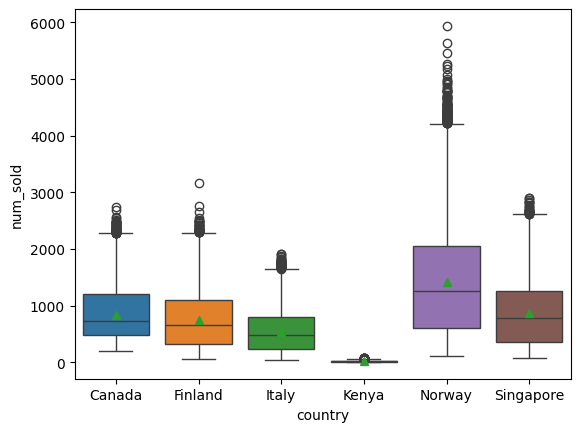

In [14]:
sns.boxplot(x='country', y='num_sold', showfliers=True, hue='country', data=df, showmeans=True)

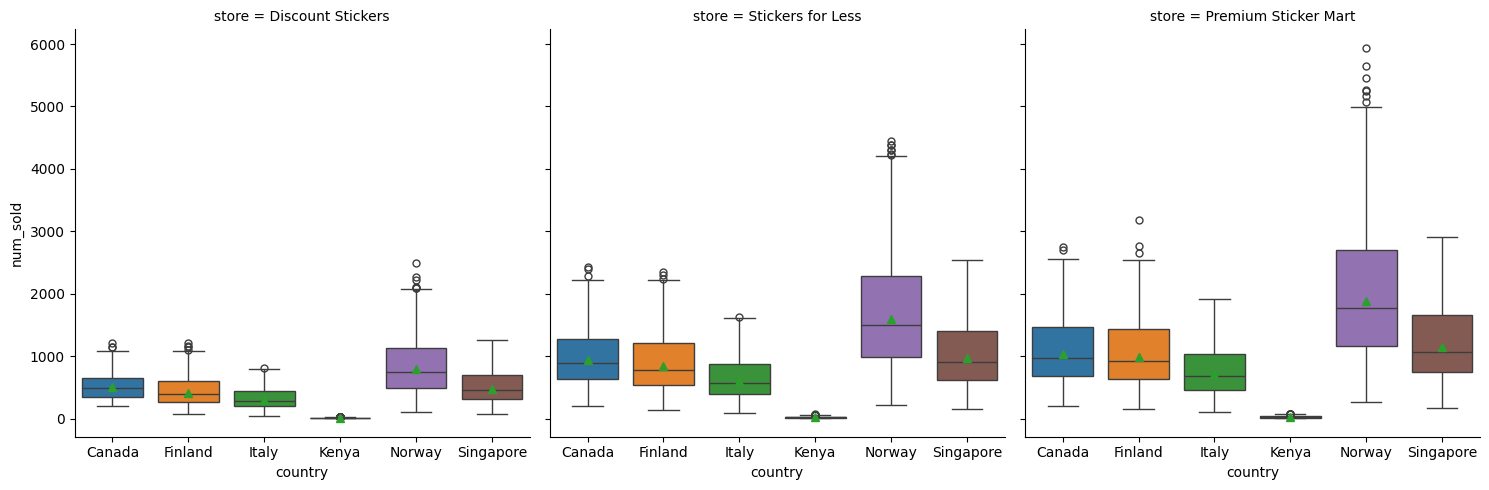

In [22]:
sns.catplot(x='country', y='num_sold', data=df, kind='box', showmeans=True, col='store', hue='country')

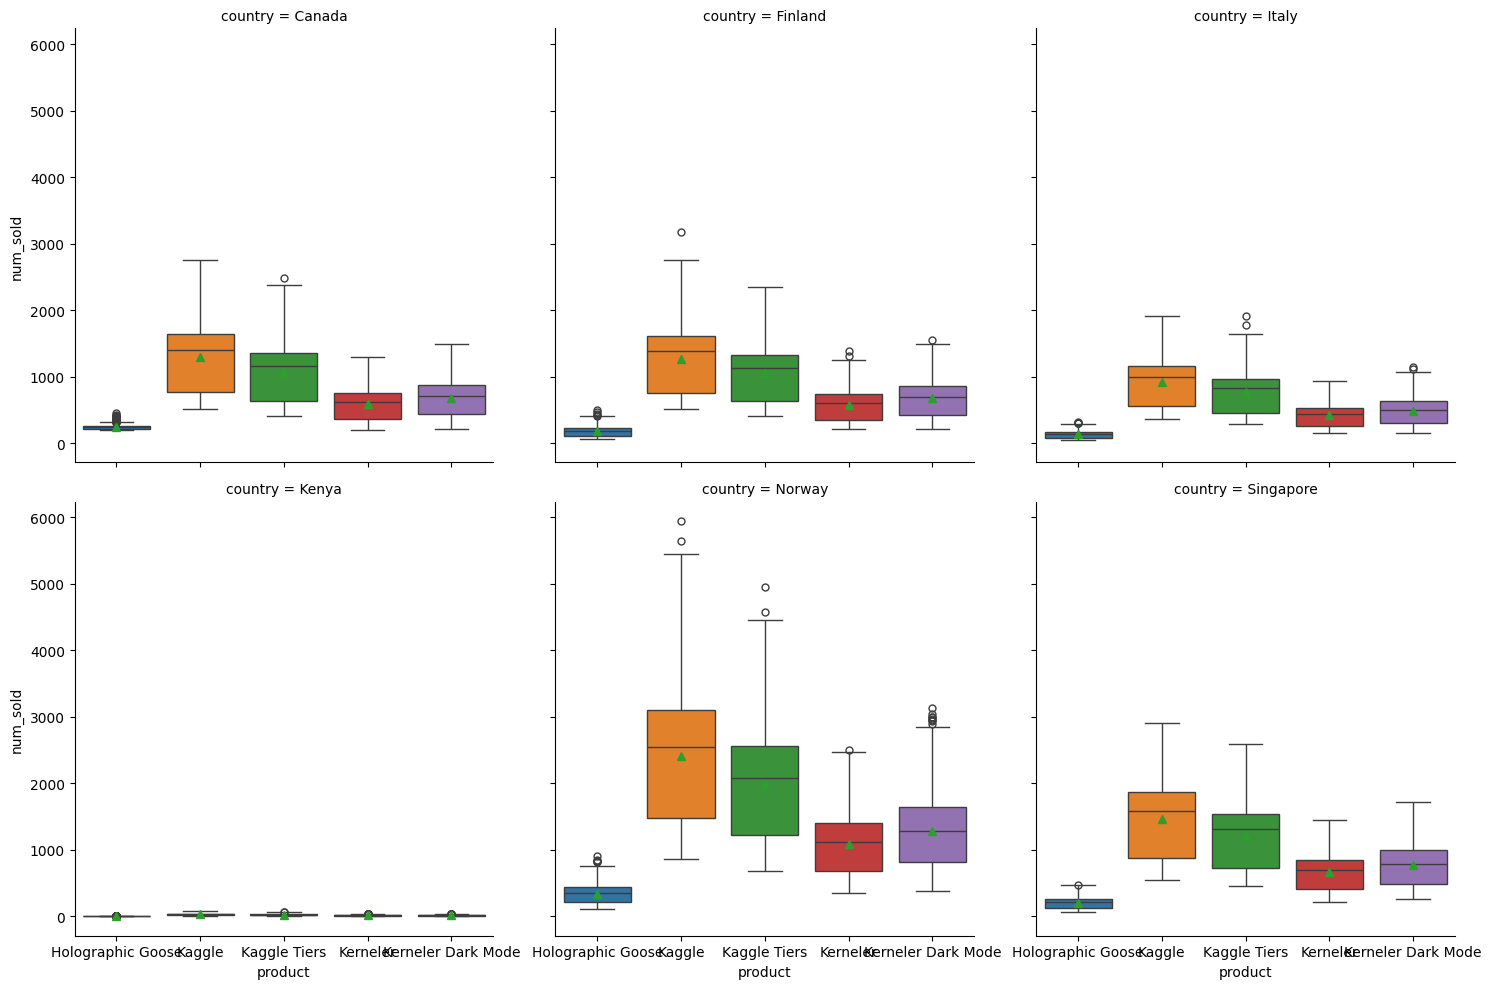

In [24]:
sns.catplot(x='product', y='num_sold', data=df, kind='box', showmeans=True, col='country', hue='product', col_wrap=3)

In [86]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate

In [87]:
df.head()

,country,store,product,num_sold,year,month,day
id,,,,,,,
0,Canada,Discount Stickers,Holographic Goose,0.0,2010,1,1
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [88]:
labelencoder = LabelEncoder()
dit = {}
for col in ['product', 'store', 'country']:
    df[col] = labelencoder.fit_transform(df[col])
    dit[col] = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

In [89]:
train, test, y_train, y_test = train_test_split(df.drop(columns='num_sold'), df['num_sold'], test_size=0.25, random_state=999)

In [90]:
cls = HistGradientBoostingRegressor()
cls.fit(train, y_train)
cls.score(test, y_test)

0.9770926945285288

In [91]:
cls.predict(test)

array([ 167.90915974, 2165.54033505,  340.99087851, ..., 1475.32856209,
       3010.01522698,   34.9055743 ])

In [94]:
def mape(y_true, y_pred):
    return mean_absolute_percentage_error(np.expm1(y_true), np.expm1(y_pred))

In [96]:
mape(y_test, cls.predict(test).astype(int))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/qb/snyt9mjs78z7q90zw41y7_mc0000gn/T/ipykernel_75060/3083356761.py:2: RuntimeWarning: overflow encountered in expm1
  return mean_absolute_percentage_error(np.expm1(y_true), np.expm1(y_pred))


ValueError: Input contains infinity or a value too large for dtype('float64').

In [71]:
cross_validate(cls, train, y_train, cv=5, scoring='r2')

{'fit_time': array([2.70468783, 2.66849089, 2.66316986, 2.69911814, 2.73516989]),
 'score_time': array([0.04254103, 0.04125309, 0.04153895, 0.04148197, 0.04229808]),
 'test_score': array([0.97745077, 0.97703133, 0.97730079, 0.97719237, 0.97749381])}

In [75]:
test = pd.read_csv(f'{dirs}/test.csv', index_col=0).fillna(0)
test = test.assign(**{
    'year': test['date'].str.split('-').str[0].astype(int),
    'month': test['date'].str.split('-').str[1].astype(int),
    'day': test['date'].str.split('-').str[2].astype(int),
})
test = test.drop(columns=['date'])
test.head()

,country,store,product,year,month,day
id,,,,,,
230130,Canada,Discount Stickers,Holographic Goose,2017,1,1
230131,Canada,Discount Stickers,Kaggle,2017,1,1
230132,Canada,Discount Stickers,Kaggle Tiers,2017,1,1
230133,Canada,Discount Stickers,Kerneler,2017,1,1
230134,Canada,Discount Stickers,Kerneler Dark Mode,2017,1,1


In [76]:
for col in ['product', 'store', 'country']:
    test[col] = labelencoder.fit_transform(test[col])
    dit[f'test_{col}'] = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
test.head()

,country,store,product,year,month,day
id,,,,,,
230130,0,0,0,2017,1,1
230131,0,0,1,2017,1,1
230132,0,0,2,2017,1,1
230133,0,0,3,2017,1,1
230134,0,0,4,2017,1,1


In [78]:
test = test.assign(num_sold=cls.predict(test).astype(int))
test.head()

,country,store,product,year,month,day,num_sold
id,,,,,,,
230130,0,0,0,2017,1,1,60
230131,0,0,1,2017,1,1,741
230132,0,0,2,2017,1,1,621
230133,0,0,3,2017,1,1,321
230134,0,0,4,2017,1,1,390
